<a href="https://colab.research.google.com/github/IrfanDaffa10/Irfan-Daffayudha-Artificial-Intelegence-/blob/main/Selamat_Datang_di_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


<ipython-input-4-20e5bc920162>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


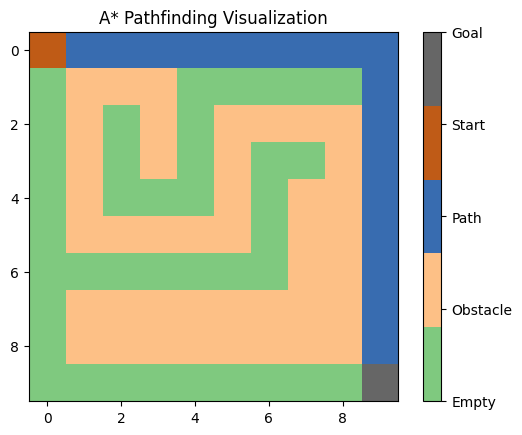

In [4]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (9, 9)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")